## _PandaML_

- Perform detailed Exploratory Data Analysis on STT Data.

In [37]:
import os
import glob
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import trackml.dataset
import tensorflow as tf
import seaborn as sns

In [2]:
path = os.environ['HOME']+'/current/2_deepana/pandaml/data/'

## Dataset

In [19]:
# load event (hits) using trackml.dataset (update: pandaroot will now generate tubes.csv as cells.csv)
event_id = 1
prefix = path + str('event{!s}'.format(format(event_id, '010d')))
hits, tubes, particles, truth = trackml.dataset.load_event(prefix)

In [20]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,6.99749,15.150000,35.0,9,0,99
1,2,7.87217,15.655000,35.0,9,1,208
2,3,7.87217,16.665001,35.0,9,2,324
3,4,7.87217,17.674999,35.0,9,3,446
4,5,8.74686,18.180000,35.0,9,4,573


In [23]:
tubes.head()

,hit_id,isochrone,depcharge,energyloss,volume_id,layer_id,module_id,skewed,sector_id
0,1,0.104147,10223000.0,10.22300,9,0,99,0,5
1,2,0.477515,1246860.0,1.24686,9,1,208,0,5
2,3,0.028947,6736290.0,6.73629,9,2,324,0,5
3,4,0.414719,4375780.0,4.37578,9,3,446,0,5
4,5,0.152061,6719330.0,6.71933,9,4,573,0,5


In [28]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pdgcode,start_time
0,1,0.0,0.0,0.0,-1.452330,-1.950250,-0.306385,1,1,13,0
1,2,0.0,0.0,0.0,-0.261170,-1.131130,-0.300518,1,1,13,0
2,3,0.0,0.0,0.0,0.969288,0.779675,0.190717,1,1,13,0
3,4,0.0,0.0,0.0,0.218074,0.802688,1.340770,1,1,13,0
4,5,0.0,0.0,0.0,0.763200,0.793767,1.781970,1,1,13,0


In [29]:
truth.head()

,hit_id,tx,ty,tz,tpx,tpy,tpz,weight,particle_id
0,1,7.08407,15.108000,-5.88552,0.830402,1.71179,-0.672612,0.0,10
1,2,7.44967,15.860600,-6.18132,0.832640,1.71078,-0.672359,0.0,10
2,3,7.84790,16.676901,-6.50209,0.835152,1.70969,-0.671927,0.0,10
3,4,8.24646,17.491501,-6.82236,0.837543,1.70842,-0.672095,0.0,10
4,5,8.61632,18.244200,-7.11861,0.839886,1.70727,-0.672058,0.0,10


### _Exploratory Data Analysis_

In [30]:
# first drop skewed straws. later z-axis
# hits.query('skewed==0').head()

In [31]:
plt.style.use('ggplot')

In [32]:
# truth_s = truth[['tx','ty','tz','tpx','tpy','tpz']]
# _ = truth_s.hist(figsize = (8,8))

In [33]:
# particles_s = particles[['px','py','pz']]
# _ = particles_s.hist(figsize = (8,8))

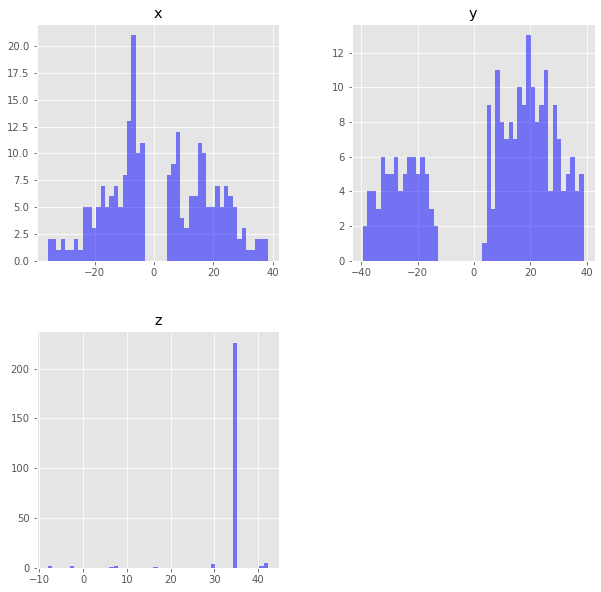

In [35]:
# Pandas: Histogram
hits_s = hits[['x', 'y', 'z']]
_ = hits_s.hist(color='b', alpha=0.5, bins=50, figsize=(10,10))

In [44]:
# Pandas: Box Plot
# color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}
# hits_s.plot.box(color=color, sym='r+', figsize=(10,10))

In [45]:
# Pandas: Scatter Plot
# hits_s.plot.scatter(x='x', y='y');

In [46]:
# Pandas: Histogram Stacked
# hits_s.plot.hist(stacked=True, bins=20, figsize=(10,10))

In [47]:
# Pandas: Scatter Matrix:
#_ = pd.scatter_matrix(hits_s, figsize=(12, 12), diagonal='hist')
#_ = pd.plotting.scatter_matrix(hits_s,figsize=(12, 12), diagonal='kde')

In [48]:
# Seaborn: Pair Plot
# _ = sns.pairplot(hits_s)

In [49]:
# Seaborn: Heatmap
# plt.figure(figsize=(10,10))
# _ = sns.heatmap(hits_s.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

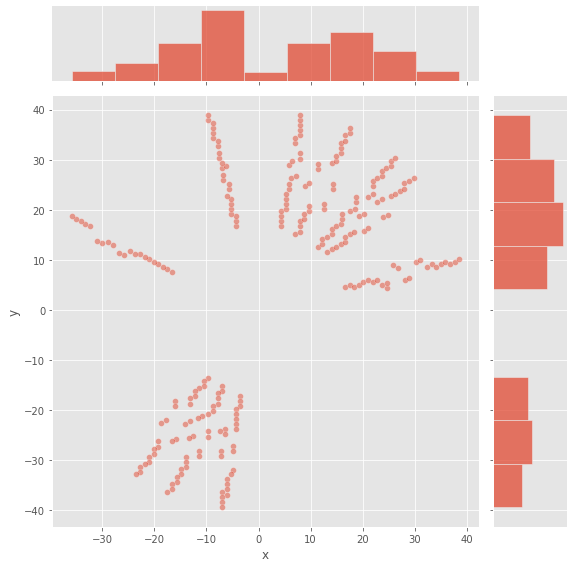

In [49]:
sns.jointplot(x="x", y="y", data=hits, alpha=0.5, height=8);